# Georgia Outcomes

In [1]:
import data_loaders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='paper',style='white', font='sans-serif', font_scale=3, color_codes=True)#, rc={'figure.figsize':(10.0,10.0)})


In [2]:
city_county=data_loaders.gimmeGA_Counties()
outcomes=data_loaders.gimmeGA()
carnegie=data_loaders.gimmeCarnegieLimted()
carnegie_ga=carnegie.loc[carnegie['stabbr']=='GA']

In [4]:
cities_shorthand=[]
split_cities=city_county['City'].str.split(' of ',n=1,expand=True)
for i in range(len(split_cities)):
    if split_cities[1][i]==None:
        cities_shorthand.append(split_cities[0][i].split(' (Part)')[0])
    else: cities_shorthand.append(split_cities[1][i].split(' (Part)')[0])

city_county['city']=cities_shorthand


In [5]:
# this  monitors cities with multiple counties but pd merge will just duplicate them
potential_issue_cities=[]
for city in carnegie_ga['city']:
    if len(city_county[city_county['city']==city])>= (2 or 0):
        potential_issue_cities.append(city)
    else: continue

potential_issue_cities=list(set(potential_issue_cities))
potential_issue_schools=carnegie_ga.loc[carnegie_ga['city'].isin(potential_issue_cities)]
carnegie_ga=pd.merge(carnegie_ga,city_county,on='city')

In [19]:
carnegie_ga['name'].loc[carnegie_ga['County']==county].count()

np.int64(0)

In [38]:
carnegie_counties_summed=[]

for county in list(set(city_county['County'])):
    carnegie_counties_summed.append([county,
    carnegie_ga['name'].loc[carnegie_ga['County']==county].count(),
    carnegie_ga['basic2021'].loc[carnegie_ga['County']==county].loc[carnegie_ga['basic2021']==0].count(),
    carnegie_ga['basic2021'].loc[carnegie_ga['County']==county].loc[carnegie_ga['basic2021']==1].count(),
    carnegie_ga['basic2021'].loc[carnegie_ga['County']==county].loc[carnegie_ga['basic2021']==2].count(),
    carnegie_ga['basic2021'].loc[carnegie_ga['County']==county].loc[carnegie_ga['basic2021']==3].count(),
    carnegie_ga['basic2021'].loc[carnegie_ga['County']==county].loc[carnegie_ga['basic2021']==4].count(),
    carnegie_ga['basic2021'].loc[carnegie_ga['County']==county].loc[carnegie_ga['basic2021']==5].count(),
    carnegie_ga['msi'].loc[carnegie_ga['County']==county].sum(),
    carnegie_ga['hbcu'].loc[carnegie_ga['County']==county].sum(),
    carnegie_ga['hsi'].loc[carnegie_ga['County']==county].sum(),
    carnegie_ga['tribal'].loc[carnegie_ga['County']==county].sum(),
    carnegie_ga['womens'].loc[carnegie_ga['County']==county].sum(),
    carnegie_ga['control'].loc[carnegie_ga['County']==county].loc[carnegie_ga['control']==1].sum(),
    carnegie_ga['rooms'].loc[carnegie_ga['County']==county].mean()])

carnegie_counties_summed=pd.DataFrame(carnegie_counties_summed,columns=['County','Has School','Associates','Professional','R Schools','Doctoral','Masters','Bachelors','msi','hbcu','hsi','tribal','womens','control','rooms'])
outcomes_combined=pd.merge(outcomes,carnegie_counties_summed,on='County')
outcomes_combined=outcomes_combined.fillna(0)

## Does not ignore 0 counties

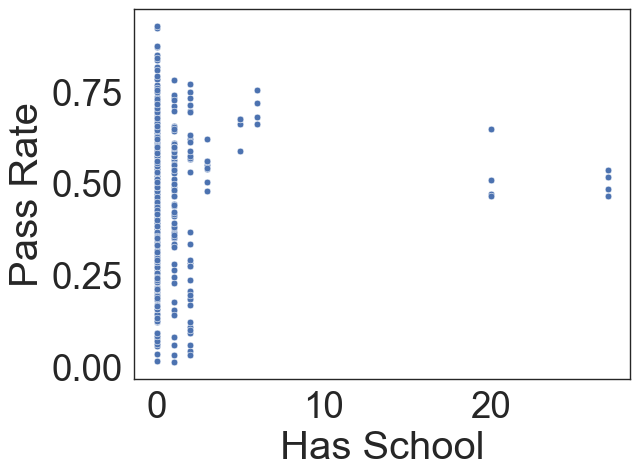

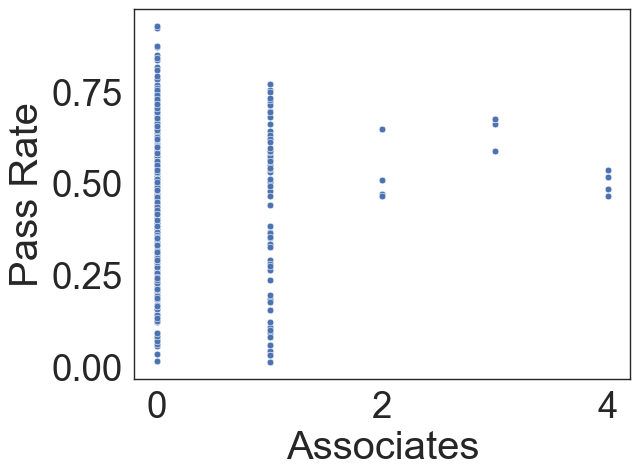

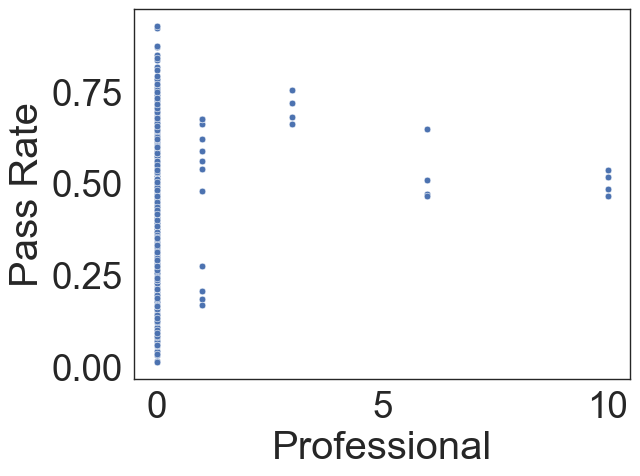

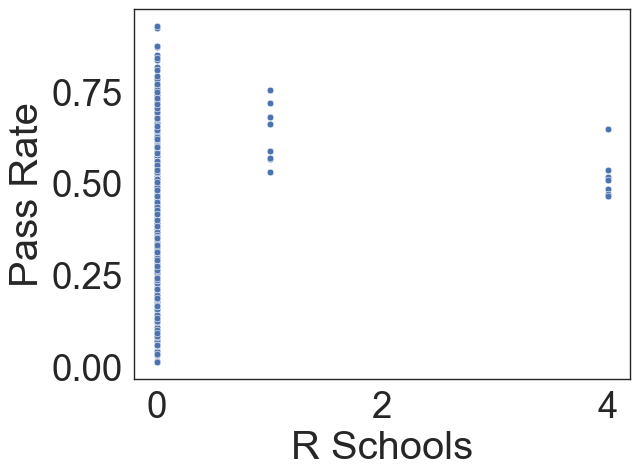

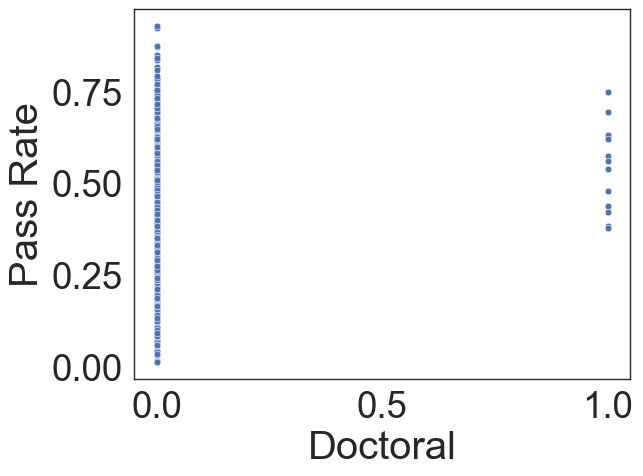

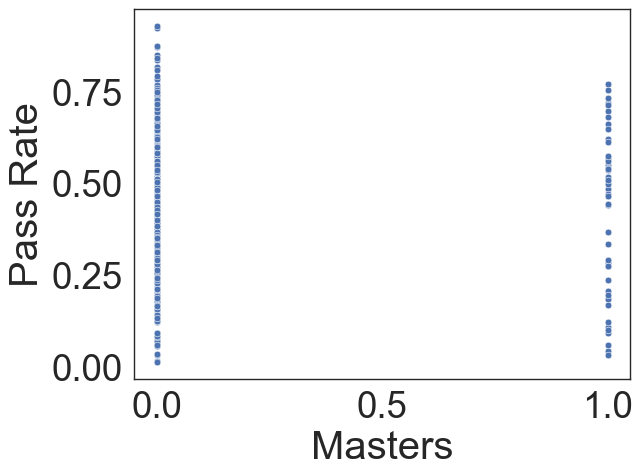

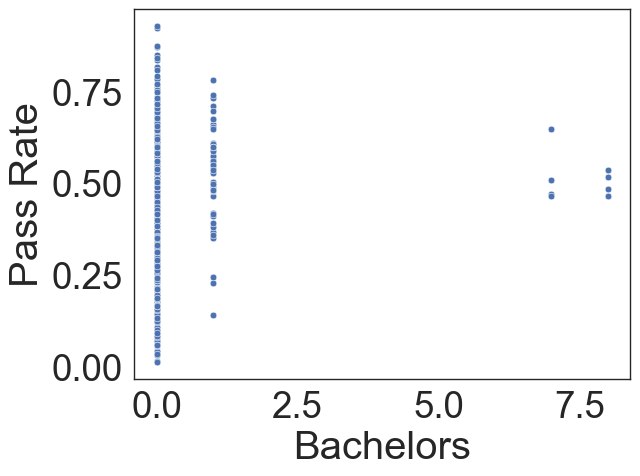

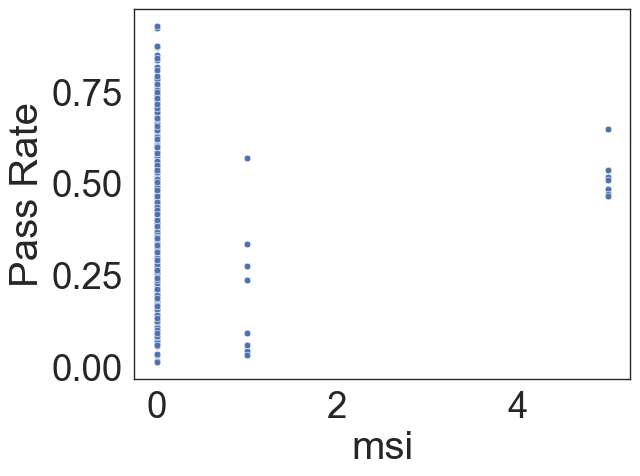

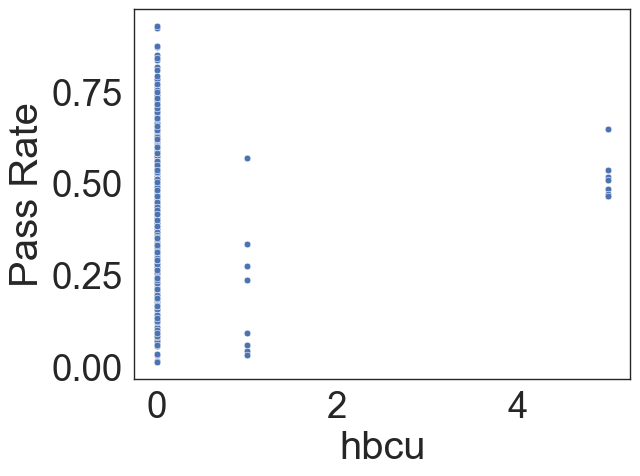

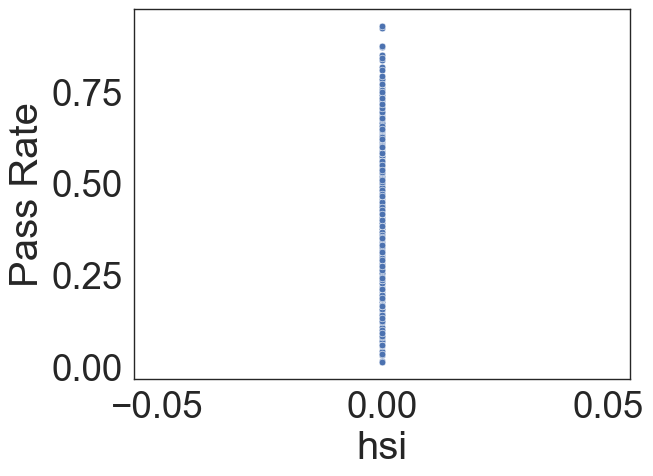

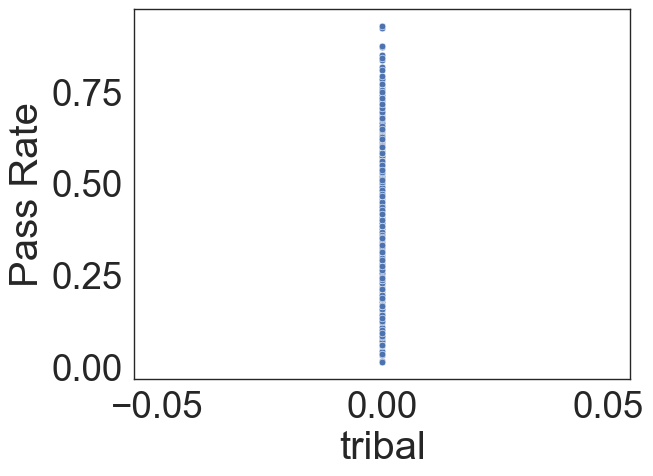

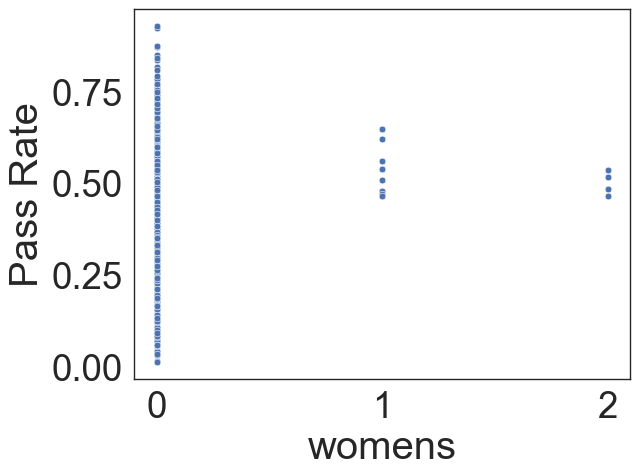

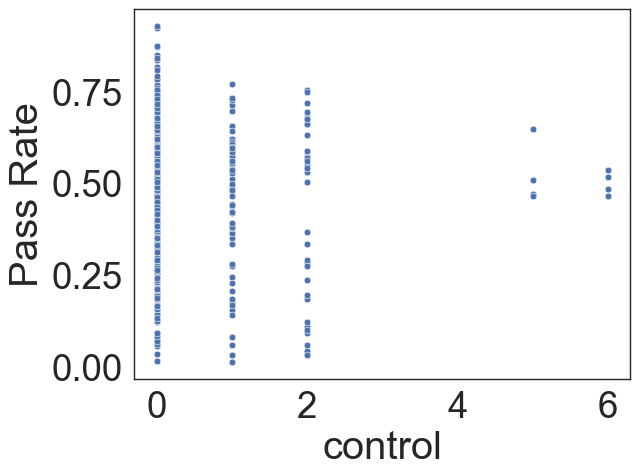

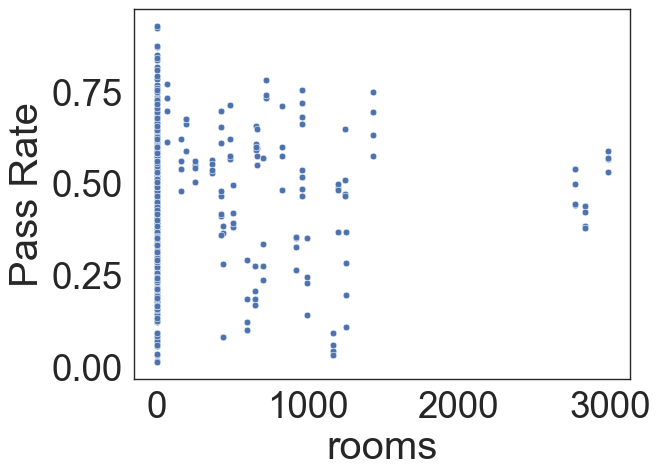

In [39]:
for category in ['Has School','Associates','Professional','R Schools','Doctoral','Masters','Bachelors','msi','hbcu','hsi','tribal','womens','control','rooms']:
    sns.scatterplot(data=outcomes_combined.loc[outcomes_combined['TEST_CMPNT_TYP_NM']=='ALL Subjects'],x=category,y='Pass Rate')
    # plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel(category)
    plt.ylabel('Pass Rate')
    plt.show()

In [53]:
outcomes_combined.index=outcomes_combined['County']
correlations_with_0=outcomes_combined[['Has School','Associates','Professional','R Schools','Doctoral','Masters','Bachelors','msi','hbcu','hsi','tribal','womens','control','rooms','Pass Rate']].corr()


In [55]:
correlations_with_0['Pass Rate']

Has School      0.083134
Associates      0.118943
Professional    0.086281
R Schools       0.069771
Doctoral        0.015923
Masters         0.005782
Bachelors       0.062507
msi             0.032711
hbcu            0.032711
hsi                  NaN
tribal               NaN
womens          0.044657
control         0.075051
rooms           0.000059
Pass Rate       1.000000
Name: Pass Rate, dtype: float64

## Ignores 0 counties

In [40]:
outcomes_combined.loc[outcomes_combined['TEST_CMPNT_TYP_NM']=='ALL Subjects'].loc[outcomes_combined[category]!=0]

,SCHOOL_DSTRCT_NM,TEST_CMPNT_TYP_NM,NUMBER_TESTS_TAKEN,NOTESTS_3ORHIGHER,Year,Pass Rate,County,Has School,Associates,Professional,...,Doctoral,Masters,Bachelors,msi,hbcu,hsi,tribal,womens,control,rooms
8,Baldwin County,ALL Subjects,46.0,13.0,2019,0.282609,Baldwin,2,1,0,...,0,1,0,0,0,0,0,0,2,1253.5
77,Bulloch County,ALL Subjects,268.0,152.0,2019,0.567164,Bulloch,2,1,0,...,0,0,0,0,0,0,0,0,2,2987.0
109,Carroll County,ALL Subjects,591.0,226.0,2019,0.382403,Carroll,1,0,0,...,1,0,0,0,0,0,0,0,1,2835.0
131,Cherokee County,ALL Subjects,4743.0,3708.0,2019,0.781784,Cherokee,1,0,0,...,0,0,1,0,0,0,0,0,0,720.0
160,Clayton County,ALL Subjects,2592.0,533.0,2019,0.205633,Clayton,2,0,1,...,0,1,0,0,0,0,0,0,1,648.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4097,Whitfield County,ALL Subjects,633.0,340.0,2022,0.537125,Whitfield,1,0,0,...,0,0,1,0,0,0,0,0,1,363.0
4122,Fulton County,ALL Subjects,23510.0,15234.0,2019,0.647980,Fulton,20,2,6,...,0,1,7,5,5,0,0,1,5,1248.3
4158,Fulton County,ALL Subjects,373617891.0,190112996.0,2020,0.508843,Fulton,20,2,6,...,0,1,7,5,5,0,0,1,5,1248.3
4190,Fulton County,ALL Subjects,311516137.0,146410377.0,2021,0.469993,Fulton,20,2,6,...,0,1,7,5,5,0,0,1,5,1248.3


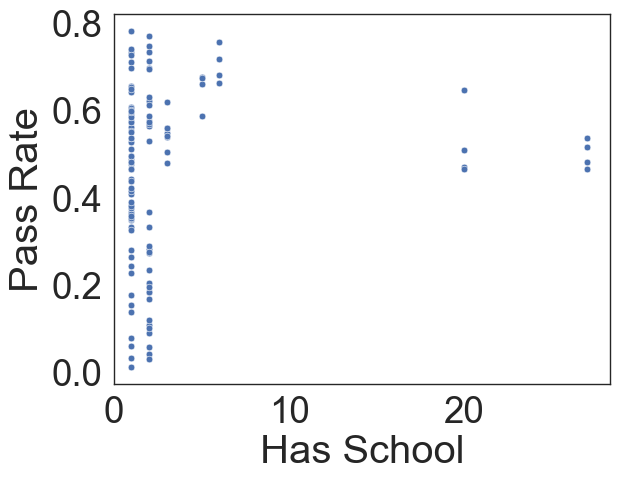

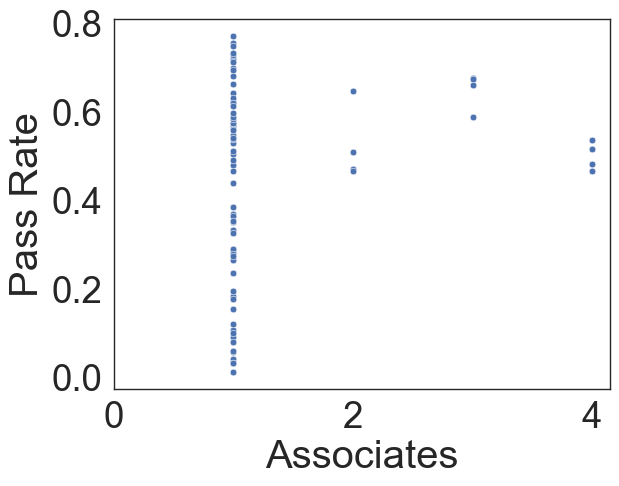

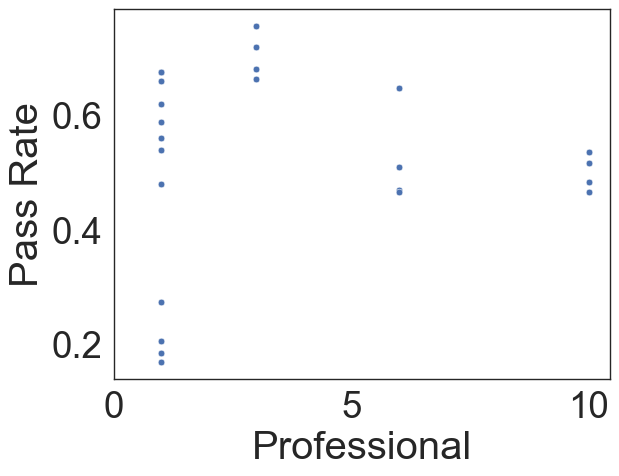

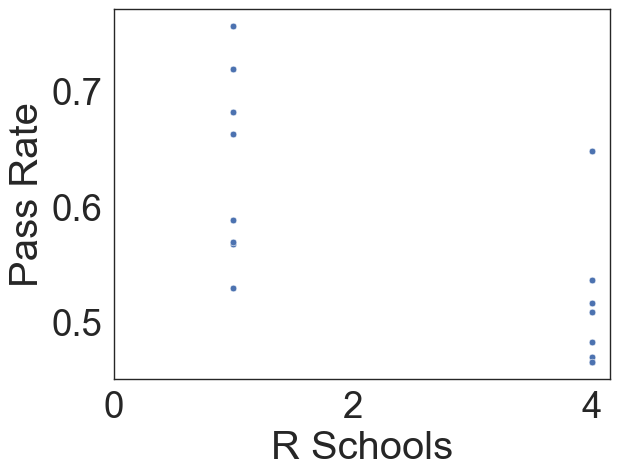

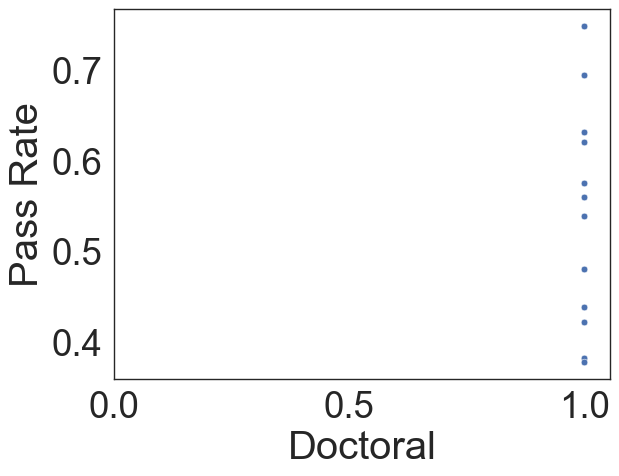

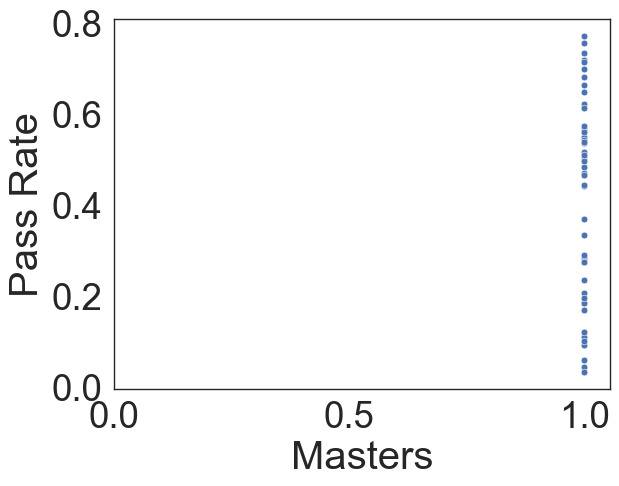

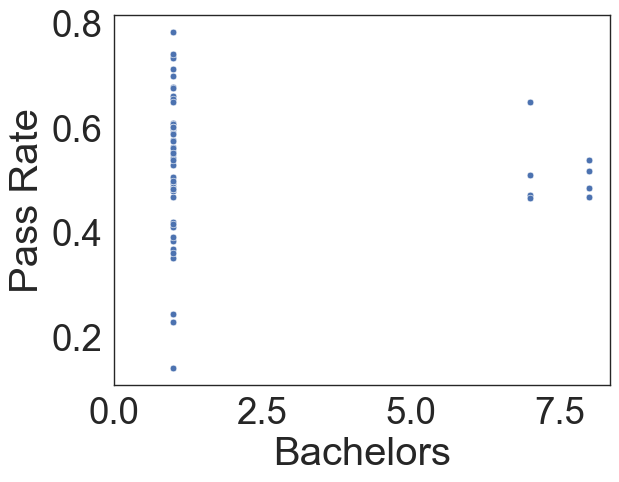

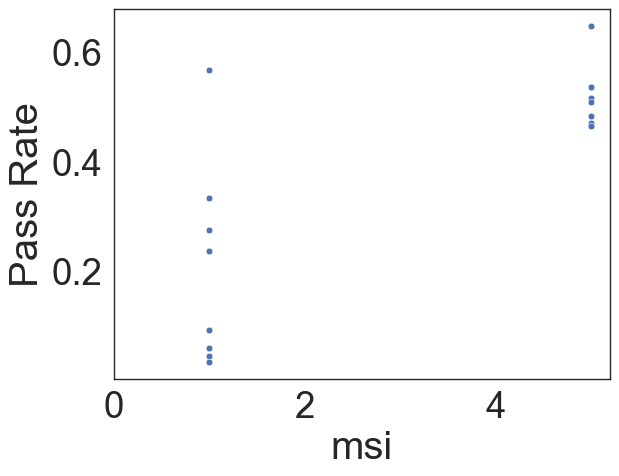

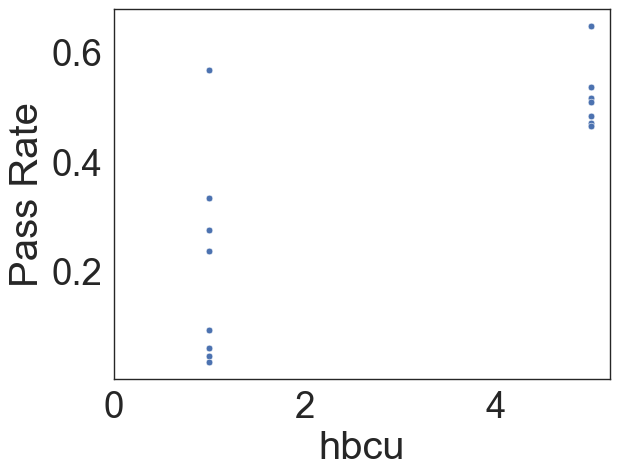

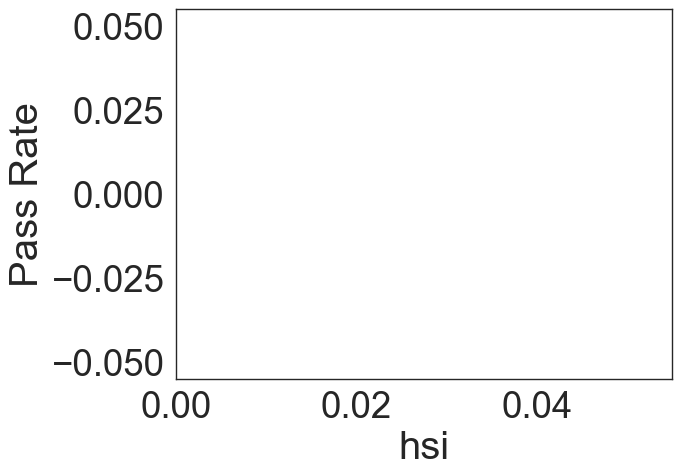

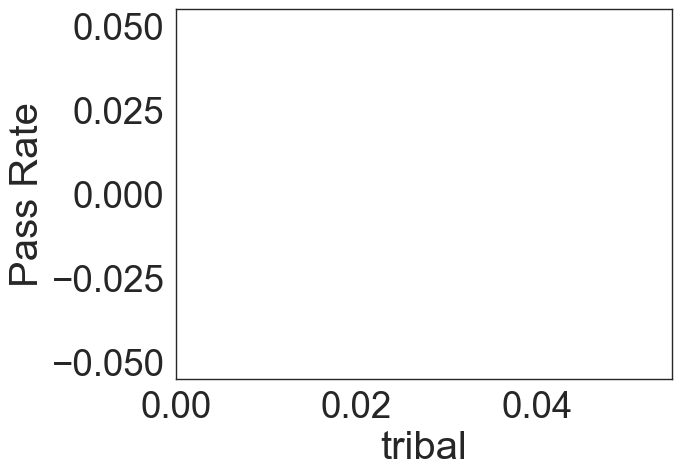

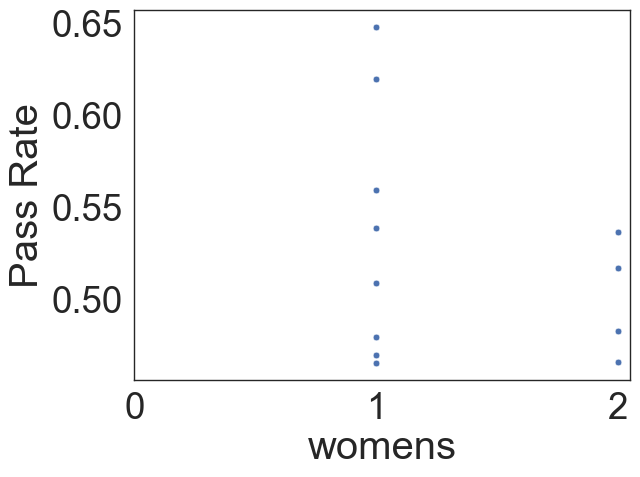

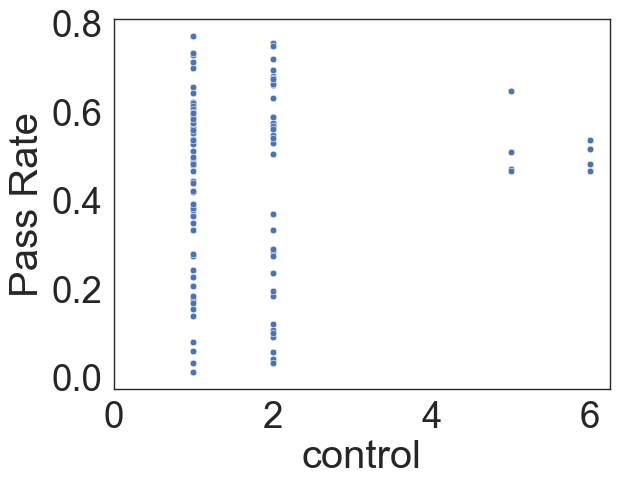

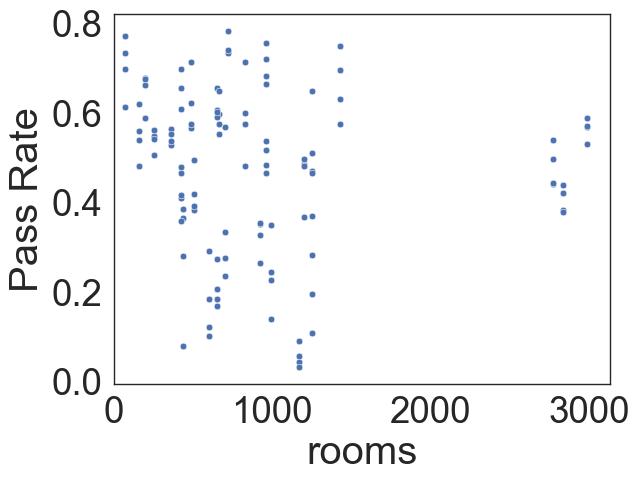

In [42]:
for category in ['Has School','Associates','Professional','R Schools','Doctoral','Masters','Bachelors','msi','hbcu','hsi','tribal','womens','control','rooms']:
    sns.scatterplot(data=outcomes_combined.loc[outcomes_combined['TEST_CMPNT_TYP_NM']=='ALL Subjects'].loc[outcomes_combined[category]!=0],x=category,y='Pass Rate')
    # plt.legend(bbox_to_anchor=(1,1))
    plt.xlabel(category)
    plt.ylabel('Pass Rate')
    plt.xlim(0)
    plt.show()

In [58]:
correlations_no_0=outcomes_combined[['Has School','Associates','Professional','R Schools','Doctoral','Masters','Bachelors','msi','hbcu','hsi','tribal','womens','control','rooms','Pass Rate']].loc[outcomes_combined['Has School']!=0].corr()
correlations_no_0['Pass Rate']

Has School      0.091523
Associates      0.152118
Professional    0.101887
R Schools       0.077585
Doctoral       -0.002046
Masters        -0.051438
Bachelors       0.060530
msi             0.021142
hbcu            0.021142
hsi                  NaN
tribal               NaN
womens          0.037803
control         0.067368
rooms          -0.090513
Pass Rate       1.000000
Name: Pass Rate, dtype: float64